# **Evaluación mensual del modelo.**

A continuación se realizará la evaluación de nuestro modelo entrenado con datos de enero 2020, contrastando su desempeño respecto a distintos meses del año. En este caso serán: Febrero, Marzo y Abril del 2020.

### **Estrategia de ingesta.**

Para cumplir con este objetivo, generamos una nueva función llamada 'load_taxi_data_full', la cual descarga y consolida los datos desde las diferentes URLs donde se encuentran almacenados los datos de viajes en taxi.

A través de un ciclo *for* podemos modificar la fecha de la URL ('yellow_tripdata_{year}-{month}.parquet') en base a nuestro interés y conveniencia.

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet

Nota: *Por límites en la memoria RAM de Google Collab, limitamos el análisis hasta Abril del 2020.*

### **Estrategia de evaluación.**

Adicionalmente, generamos la función 'evaluate_months'. Utilizando un ciclo *for* iteramos por cada uno de los meses de interés, los que se definen en los argumentos start_month y end_month. Filtramos el dataframe por el mes actual del bucle y realizamos la predicción junto con la evaluación. Finalmente, se almacena el mes, el volumen de casos y el F1-Score en una nueva variable ('results').

## Carga del proyecto

Primero que todo, cargaremos nuestro propio proyecto y realizaremos las importaciones necesarias.

In [1]:
!git clone https://github.com/cpizarrov/Tarea_1.git

Cloning into 'Tarea_1'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 149 (delta 65), reused 115 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (149/149), 3.34 MiB | 21.49 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
%cd /content/Tarea_1

/content/Tarea_1


In [3]:
!pip install -r /content/Tarea_1/requirements.txt

In [4]:
from src import (
    load_taxi_data,
    load_taxi_data_full,
    preprocess,
    train_model,
    predict,
    load_model,
    evaluate,
    evaluate_months,
    features,
    target_col,
    plot_casos,
    plot_f1score
)

## Carga de datos de entrenamiento y del modelo

In [5]:
df = load_taxi_data()
df = preprocess(df, target_col)

In [6]:
model = load_model("models/random_forest.joblib")

## Carga de datos para evaluación (hasta abril 2020)

In [7]:
df_full = preprocess(load_taxi_data_full("2020"), target_col)

 Cargando https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet
 Cargando https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-02.parquet
 Cargando https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-03.parquet
 Cargando https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-04.parquet


## Generamos la evaluación del modelo y observamos la evolución de los resultados

In [8]:
results = evaluate_months(model, df=df_full, year="2020", start_month=1, end_month=4)
results

,mes,n_casos,f1_score
0,2020-01,6380121,0.7298
1,2020-02,6276456,0.7350
2,2020-03,2998349,0.7258
3,2020-04,236461,0.6114


## Graficamos los resultados

Gráfico guardado en reports/figures/f1_score_por_mes.png


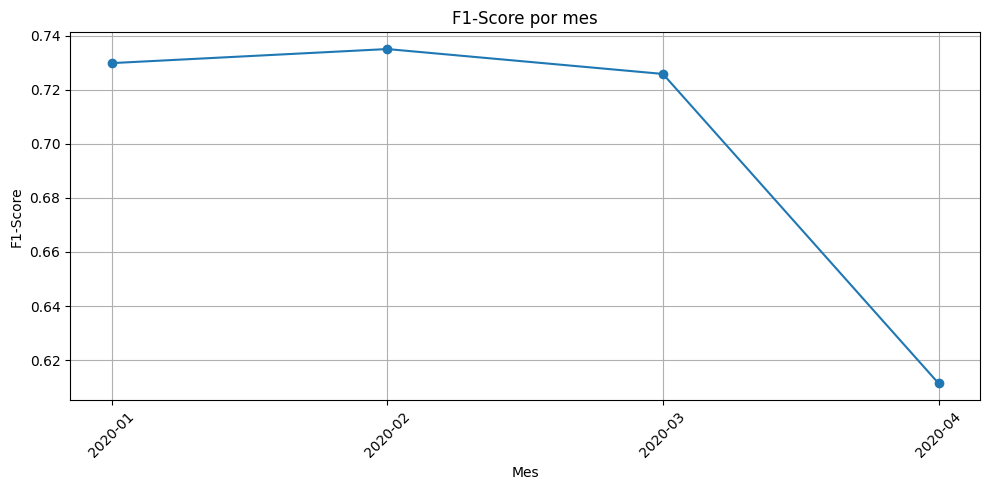

In [9]:
## Gráficos por mes
plot_f1score(results, save_dir="reports/figures")

Gráfico guardado en reports/figures/casos_por_mes.png


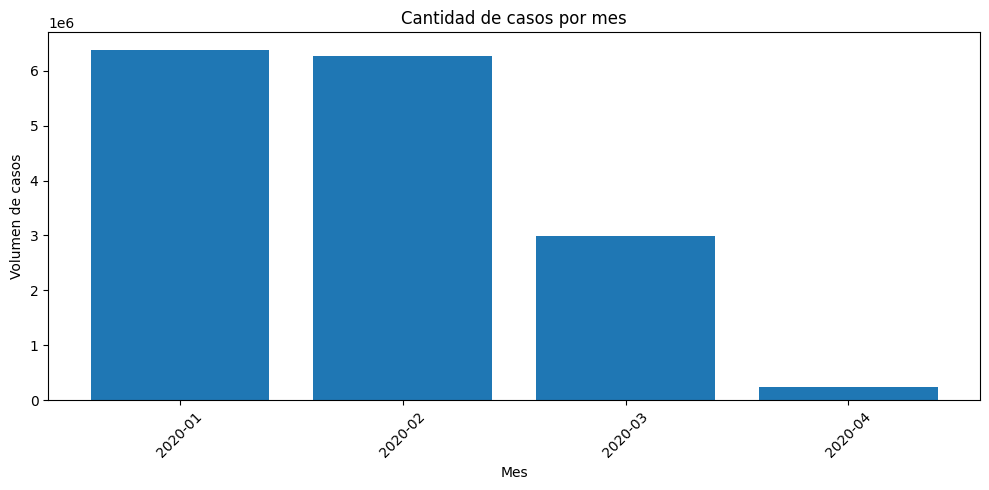

In [10]:
plot_casos(results, save_dir="reports/figures")

# **Análisis de resultados**

En general, el rendimiento del modelo se mantiene consistente desde enero hasta marzo del 2020. Sin embargo, muestra una caída significativa en abril, la cual se ve acompañada de una caída en el volumen de casos.

**¿Qué podría explicar la variación del desempeño? y ¿Qué podría haber ocurrido en abril?**

Diversos factores podrían afectar la variación del desempeño de un modelo. Por ejemplo, el comportamiento de los pasajeros o el tipo de pasajero podría tener un componente estacional que varía dependiendo del mes, de la estación o de la época del año. Es por esto que un modelo entrenado durante enero (invierno) y con buen desempeño en febrero, podría tener un pésimo rendimiento durante los meses de verano. Ligado a esto, el turismo podría jugar un rol importante.

Otro factor podría ser el contexto económico, dado que si la situación es precaria (ej. alta tasa de desempleo), es probable que menos personas prefieran este tipo de transporte.

Tampoco podemos olvidar como la pandemia del COVID-19 generó, a nivel mundial, un cambio en las dinámicas de movilidad debido a las restricciones sanitarias. De hecho, es altamente probable que ésto último sea lo que está afectando tanto al rendimiento del modelo como a la baja cantidad de casos observados en abril (y que venían disminuyendo desde marzo), dado que en esas fechas se comenzaron a aplicar las restricciones sanitarias en Nueva York (7 de marzo se declara estado de emergencia y durante el mismo mes se da la orden de quedarse en casa).

Dado que ésto último resulta ser una explicación perfectamente válida y razonable para explicar la disminución de casos y de rendimiento, no se continuará especulando del asunto. Sin embargo, en cualquier otro contexto esto constituiría una situación seria para investigar, ya que incluso podríamos estar en presencia de un problema técnico en la captura o ingesta de datos.

**Finalmente, ¿Qué podríamos hacer para mejorar la robustez del modelo?**

Una de las estrategias más recomendables sería implementar un proceso de mantenimiento continuo del modelo. Para ello, deberíamos desarrollar un pipeline automatizado de ingesta datos, que permita actualizar el modelo periódicamente mediante reentrenamientos. Esto no solo ayudaría a mantener su rendimiento, sino que también permitiría que el modelo se adapte a posibles cambios en los patrones de comportamiento. De esta forma, podríamos evitar una degradación "natural".

Por supuesto, esto no nos serviría de mucho contra otra pandemia, pero contar con una infraestructura de actualización ágil permitiría adaptar el modelo en un tiempo razonable.

Otra alternativa podría ser la de entrenar distintos modelos a partir de subconjuntos de datos segmentados, por ejemplo, por mes o por estación del año. Esto permitiría capturar patrones estacionales de forma más precisa y así mantener un rendimiento consistente a lo largo del tiempo.